# 01 - Tutorial Titanic Survived Passangers (EDA) 

by: Irfan Imaduddin <br>
ref: https://www.kaggle.com/code/andrej0marinchenko/titanic-eda-upd/notebook <br>
contact: irfanimaduddin[at]gmail.com <br>

---

## Setup

Import modules

In [1]:
import ipywidgets
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import catboost as cb

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

Read files

In [2]:
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")
dataset_result = pd.read_csv("gender_submission.csv")

## Inspect Data

In [3]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
dataset_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
dataset_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [9]:
dataset_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Summary
  
1. **Variable Description** <br>
    a. `PassengerId`: unique id number for each passenger. <br>
    b. `Survived`: survival label as the **target** or **dependent** variable (`1` = survived passenger, `0` = not survived or died passenger). <br>
    c. `Pclass`: passenger class. The values are `1`, `2` and `3` which represents for the first class (upper deck), the second class (middle deck) and the third class (lower deck), respectively. <br>
    d. `Name`: name of passenger. <br>
    e. `Sex`: gender of passenger. (`male` and `female`) <br> 
    f. `Age`: age of passenger in years. <br>
    g. `SibSp`: number of siblings or spouses aboard the Titanic. Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés were ignored). <br>
    h. `Parch`: number of parents or children aboard the Titanic. Parent = mother, father; Child = daughter, son, stepdaughter, stepson; Some children travelled only with a nanny, therefore parch = 0 for them. <br>
    i. `Ticket`: ticket number owned by each passenger. <br> 
    j. `Fare`: amount of money spent on ticket. <br>
    k. `Cabin`: cabin number for each passenger. <br>
    l. `Embarked`: port of embarkation for every passenger (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton). <br><br>

2. **Feature types** <br>
    a. **Categorical** : Survived, Pclass, Sex, SibSp, Parch, Embarked <br>
    b. **Numerical** : PassengerId, Age, Fare <br>
    c. **Mixed** : Name, Ticket, Cabin <br> <br>

3. **Length of dataset** <br>
    a. `dataset_train` = 891 <br>
    b. `dataset_test` = 418 <br>
    c. `dataset_result` = 418 <br> <br>

## Missing Values

Number of missing values in `dataset_train`

Missing values: `Age` = 177; `Cabin` = 204; `Embarked` = 2


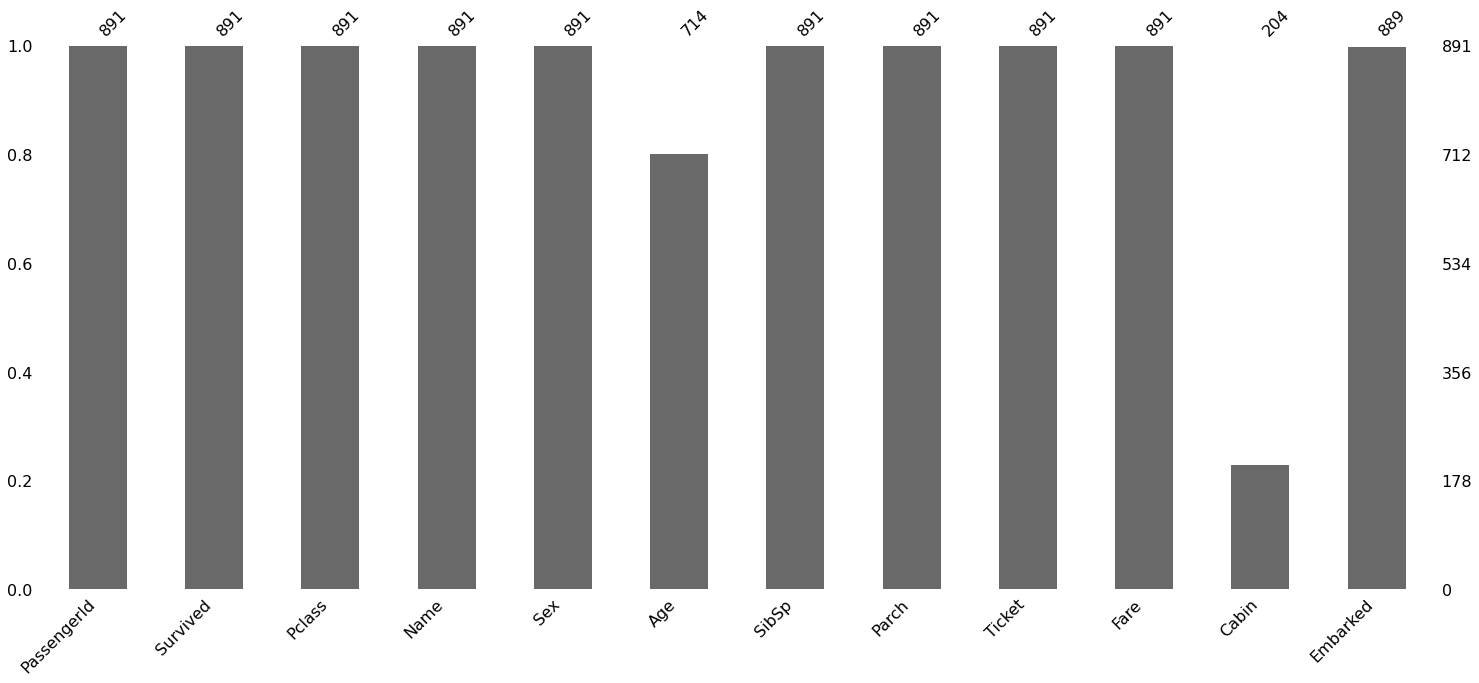

In [10]:
import missingno

missingno.bar(dataset_train)
print("Missing values: `Age` = 177; `Cabin` = 204; `Embarked` = 2")
plt.show()

Number of missing values in `dataset_test`

Missing values: `Age` = 86; `Fare` = 1; `Cabin` =  327


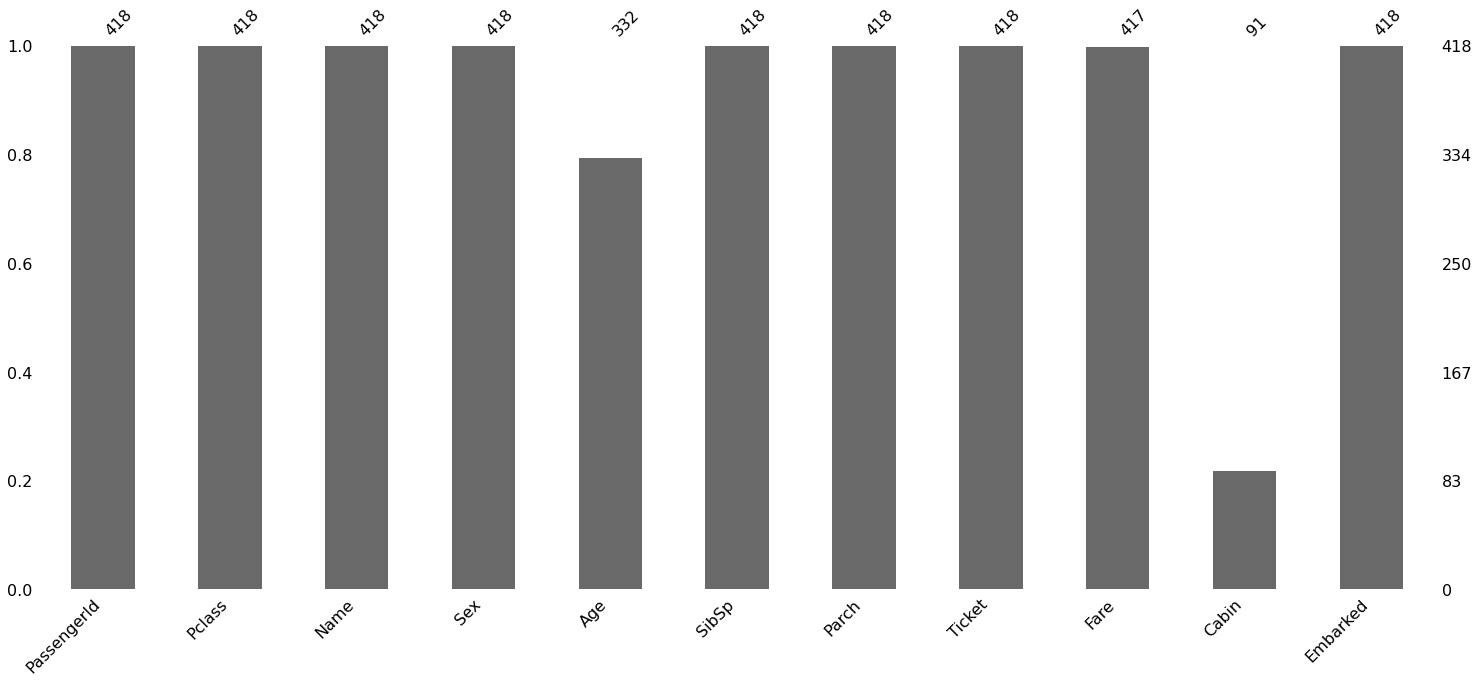

In [11]:
missingno.bar(dataset_test)
print("Missing values: `Age` = 86; `Fare` = 1; `Cabin` =  327")
plt.show()

Distribution of missing values in `dataset_train`

Missing values: `Age` = 177; `Cabin` = 204; `Embarked` = 2


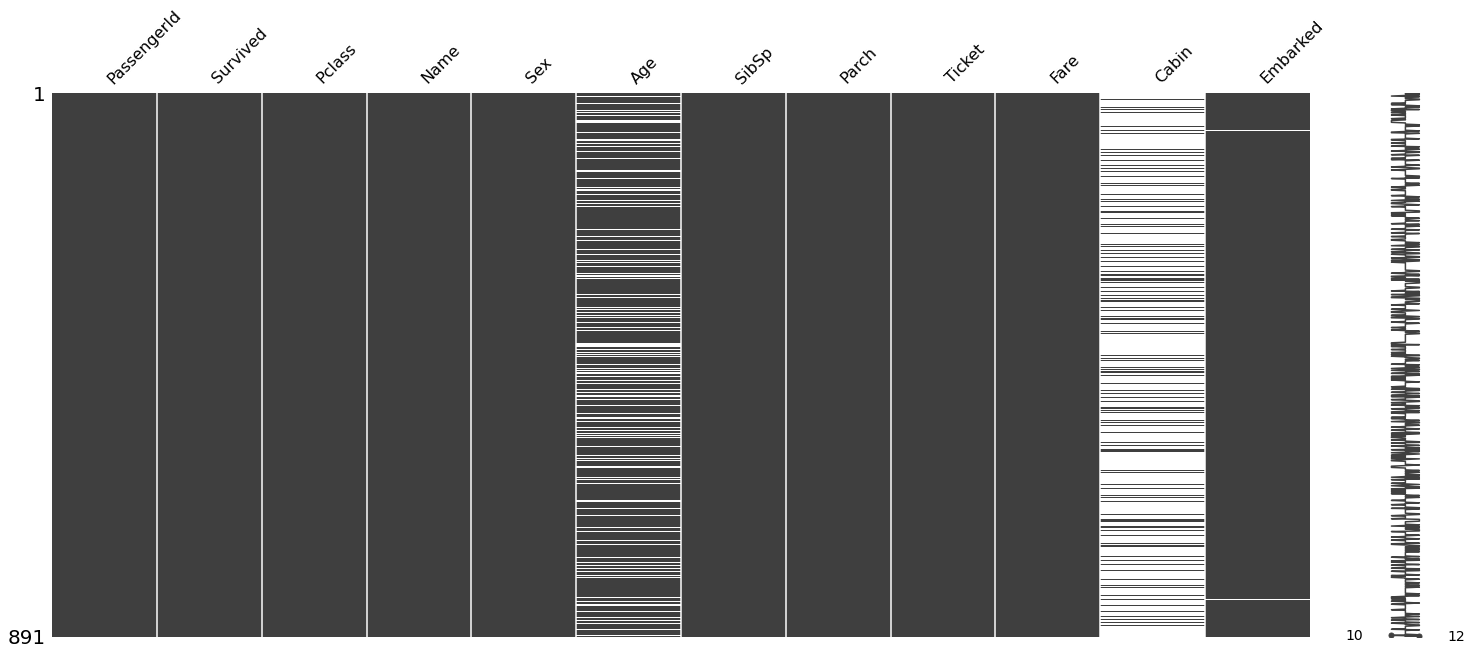

In [12]:
missingno.matrix(dataset_train)
print("Missing values: `Age` = 177; `Cabin` = 204; `Embarked` = 2")
plt.show()

Distribution of missing values in `dataset_test`

Missing values: `Age` = 86; `Fare` = 1; `Cabin` =  327


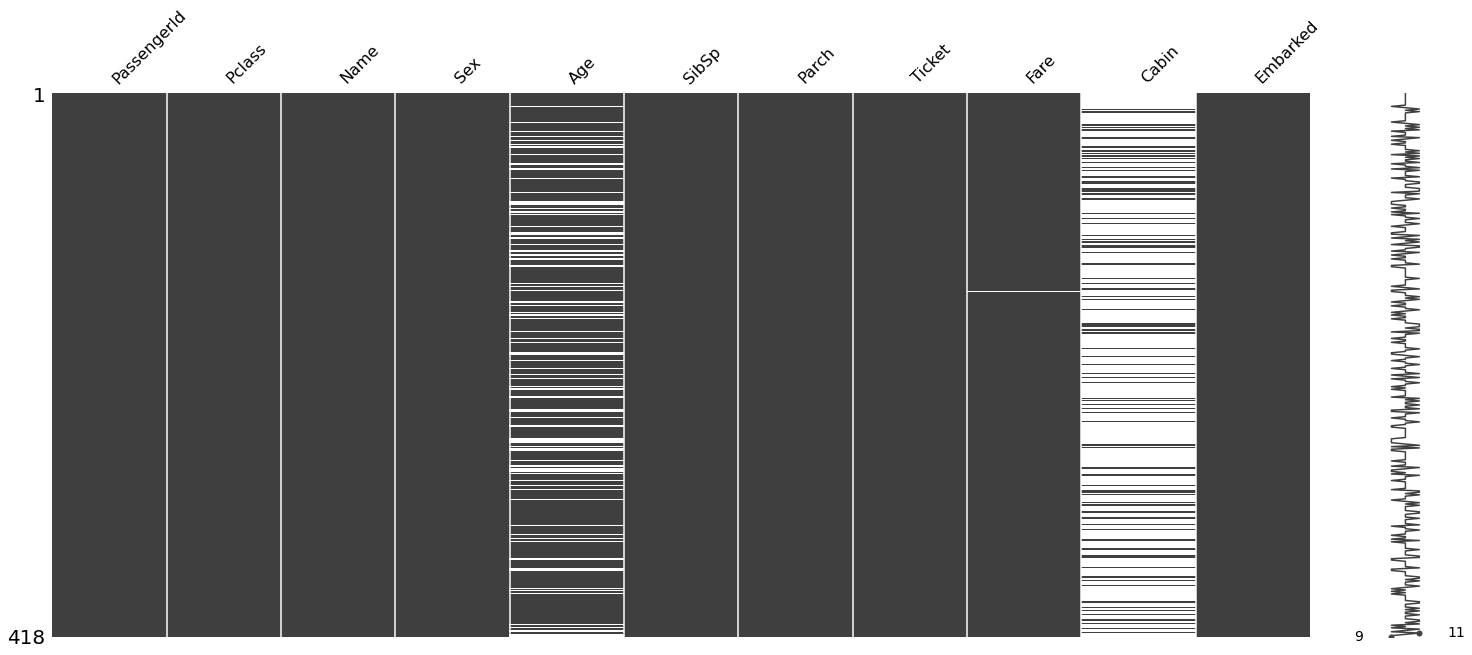

In [13]:
missingno.matrix(dataset_test)
print("Missing values: `Age` = 86; `Fare` = 1; `Cabin` =  327")
plt.show()

There are several features that have null values, which are: <br>
    a. `dataset_train` → `Age` = 177; `Cabin` =  204; `Embarked` = 2 <br>
    b. `dataset_test` → `Age` = 86; `Fare`: 1; `Cabin` =  327 <br> <br>

Let's check what kind of missingness that we have above. In general, there are three kinds of missingness.

![](https://cjasn.asnjournals.org/content/clinjasn/early/2014/02/06/CJN.10141013/F2.large.jpg?width=800&height=600&carousel=1)

Source: https://cjasn.asnjournals.org/content/early/2014/02/06/CJN.10141013/tab-figures-data?versioned=true. For more information, please check this [link](https://en.wikipedia.org/wiki/Missing_data).

For `Embarked` feature in `dataset_train`,

In [14]:
dataset_train[dataset_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We can see that there is no relation between `Embarked` with other features in the dataset. So, the missingness in `Embarked` is completely at random (MCAR).

For `Fare` feature in `dataset_test`,

In [15]:
dataset_test[dataset_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


This record contains two NULL values (`Fare` and `Cabin`). But it doesn't mean that when `Fare` has a null value, so `Cabin` does and vice versa. The missingness at this feature seems doesn't have any correlation between other features. Since we know that `Pclass` will determine how much a person has to pay a ticket fare, that doesn't mean that passengers within `3` category on `Pclass` have missing `Fare` values. So, this missingness is also the MCAR.  

For `Age` and `Cabin` features,

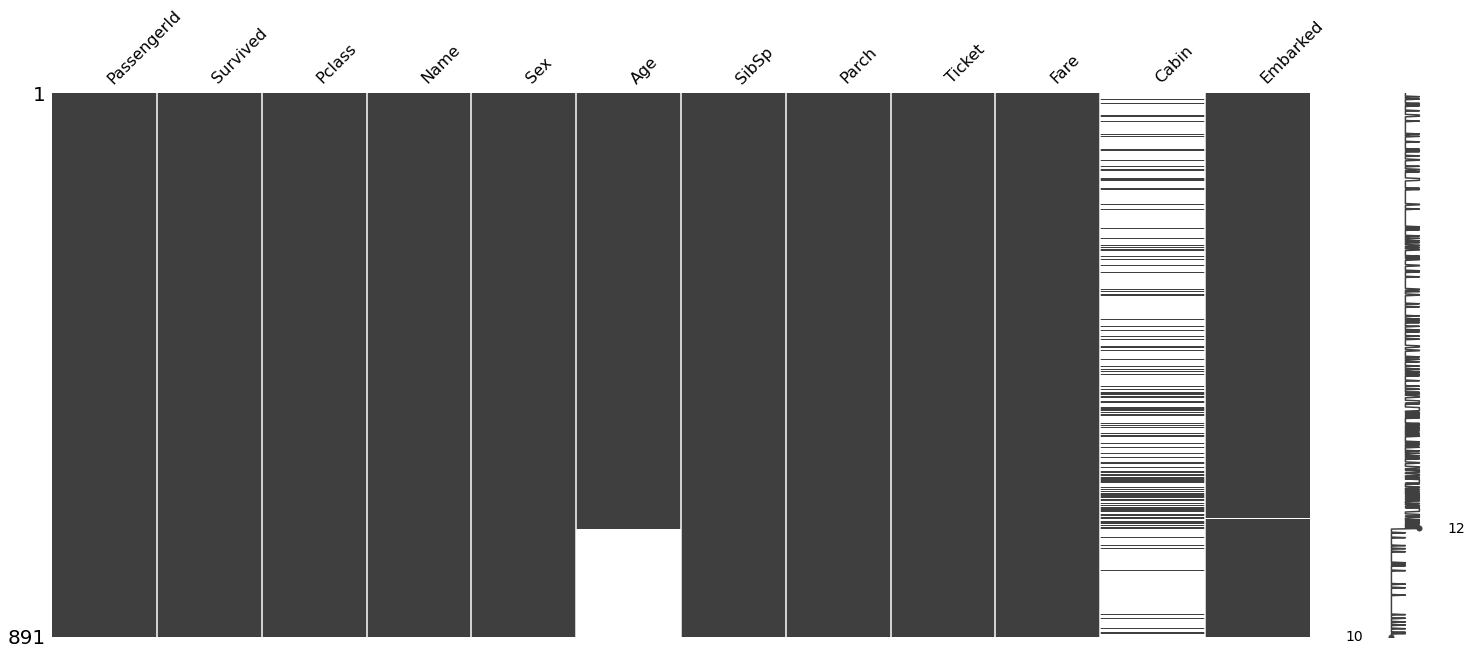

In [16]:
missingno.matrix(dataset_train.sort_values('Age'))
plt.show()

We don't see there is a pattern of missingness between `Age` and `Cabin` features. This might be a case of MAR as we can't directly see the reason for missingness of data in these features. To make it more clear, let's check the correlation between features which have missing values quantitatively. 

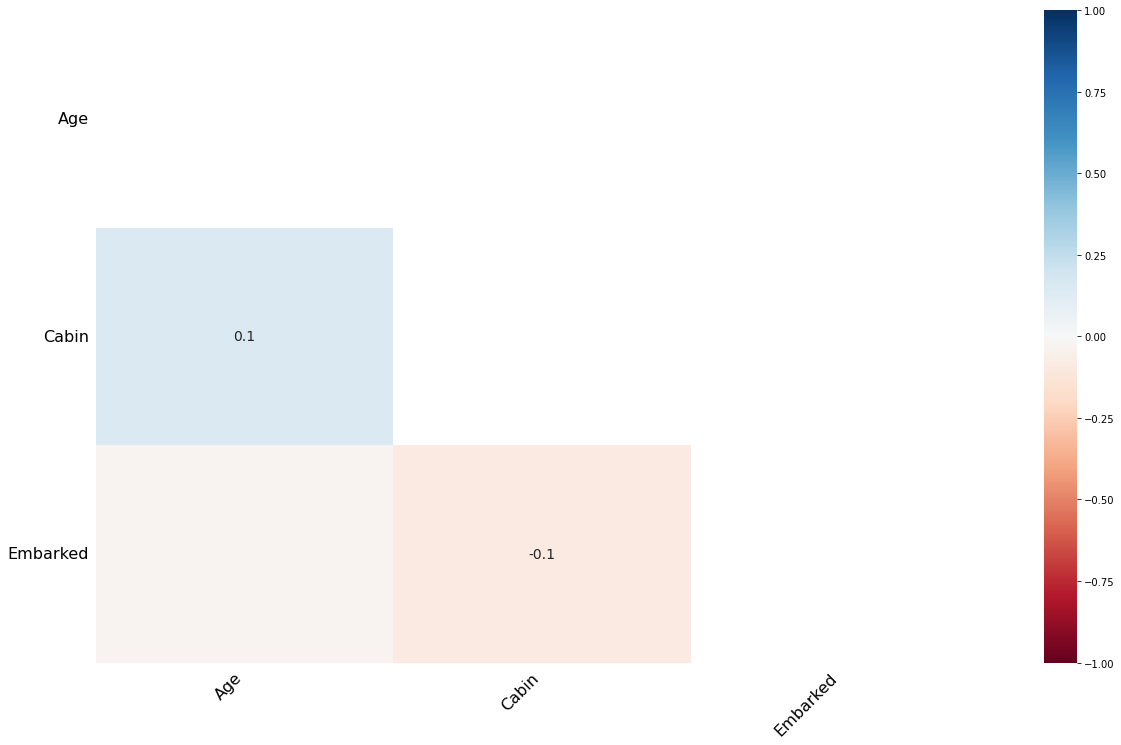

In [17]:
missingno.heatmap(dataset_train)
plt.show()

The plot above shows that there are no strong correlations (positive or negative) between missing values of different features. Low correlations indicate that the data are MAR.

## Handling Missing Values

![](https://imgur.com/68u0dD2.png)


### Missing values of `Embarked` feature in `dataset_train`

In [18]:
dataset_train[dataset_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


These two survived ladies are in a same cabin with same ticket number and fare. They might have relation and come from a same place. To fill where they embarked, we can use the value that appears the most (mode). Let's check embarked distribution for first class passengers. 

54.41% first class passengers that survived was embarked from S


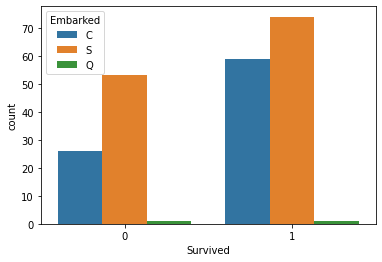

In [19]:
data = dataset_train[(dataset_train['Pclass'] == 1)]

sns.countplot(data=data, x="Survived", hue="Embarked")

survived_embarked_mode = data[data['Survived'] == 1]['Embarked'].mode().values[0]
survived_embarked_val = np.round(len(data[(data['Survived'] == 1) & (data['Embarked'] == survived_embarked_mode)])/len(data[(data['Survived'] == 1)])*100, 2)

print('{}% first class passengers that survived was embarked from {}'.format(survived_embarked_val, survived_embarked_mode))

plt.show()

Fill `Embarked` missing values with `S`

In [20]:
dataset_train['Embarked'].fillna('S', inplace=True)

In [21]:
dataset_train[dataset_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Missing values of `Fare` feature in `dataset_test`

In [22]:
dataset_test[dataset_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


The mean, median and mode of fare distribution in `dataset_test` are 12.46, 7.896 and 7.75


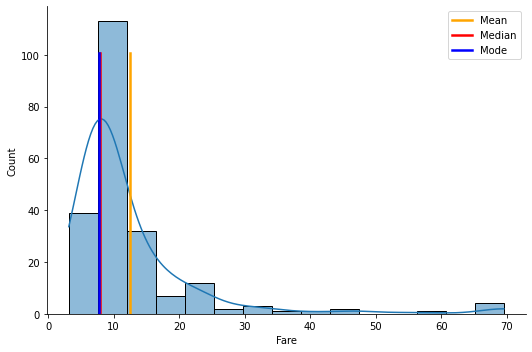

In [23]:
data = dataset_test[dataset_test['Pclass'] == 3]
sns.displot(data=data, x='Fare', bins=15, kde=True, fill=True, aspect=1.5)

plt.axvline(x=data['Fare'].mean(), ymin=0, ymax=0.85, label='Mean', color="orange", linewidth=2.5)
plt.axvline(x=data['Fare'].median(), ymin=0, ymax=0.85, label='Median', color="red", linewidth=2.5)
plt.axvline(x=data['Fare'].mode().values[0], ymin=0, ymax=0.85, label='Mode', color="blue", linewidth=2.5)

plt.legend()

print("The mean, median and mode of fare distribution in `dataset_test` are {}, {} and {}".format(np.round(data['Fare'].mean(), 3), np.round(data['Fare'].median(), 3), np.round(data['Fare'].mode().values[0], 3)))

plt.show()

We can fill the missing value in `Fare` feature using median of the distribution.

In [24]:
dataset_test['Fare'].fillna(np.round(data['Fare'].median(), 3), inplace=True)

### Missing values of `Age` features

Let's check some statistics,

The mean, median and mode of age distribution in `dataset_train` are 30, 28 and 24


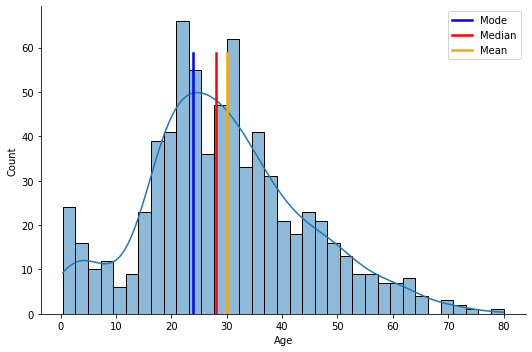

In [25]:
sns.displot(data=dataset_train, x='Age', kind="hist", bins=35, kde=True, fill=True, aspect=1.5)

age_mean = round(dataset_train['Age'].mean())
age_mode = round(dataset_train['Age'].mode().values[0])
age_median = round(dataset_train['Age'].median())

plt.axvline(x=age_mode, ymin=0, ymax=0.85, label='Mode', color="blue", linewidth=2.5)
plt.axvline(x=age_median, ymin=0, ymax=0.85, label='Median', color="red", linewidth=2.5)
plt.axvline(x=age_mean, ymin=0, ymax=0.85, label='Mean', color="orange", linewidth=2.5)

plt.legend()

print("The mean, median and mode of age distribution in `dataset_train` are {}, {} and {}".format(age_mean, age_median, age_mode))

plt.show()

The mean, median and mode of age distribution in `dataset_test` are 30, 27 and 21


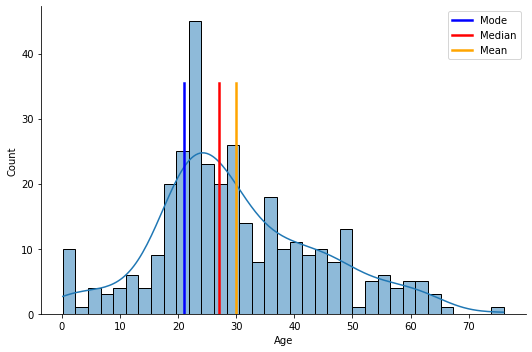

In [26]:
sns.displot(data=dataset_test, x='Age', kind="hist", bins=35, kde=True, fill=True, aspect=1.5)

age_mean = round(dataset_test['Age'].mean())
age_mode = round(dataset_test['Age'].mode().values[0])
age_median = round(dataset_test['Age'].median())

plt.axvline(x=age_mode, ymin=0, ymax=0.75, label='Mode', color="blue", linewidth=2.5)
plt.axvline(x=age_median, ymin=0, ymax=0.75, label='Median', color="red", linewidth=2.5)
plt.axvline(x=age_mean, ymin=0, ymax=0.75, label='Mean', color="orange", linewidth=2.5)

plt.legend()

print("The mean, median and mode of age distribution in `dataset_test` are {}, {} and {}".format(age_mean, age_median, age_mode))

plt.show()

We can use median from each distribution to fulfill the missing values

In [27]:
dataset_train['Age'].fillna(dataset_train['Age'].median(), inplace=True)
dataset_test['Age'].fillna(dataset_test['Age'].median(), inplace=True)

### Missing values of `Cabin` features

Let's check missingness percentages of `Cabin`,

In [28]:
missingness_cabin_train = np.round(dataset_train['Cabin'].isnull().sum()/len(dataset_train)*100, 2)
missingness_cabin_test = np.round(dataset_test['Cabin'].isnull().sum()/len(dataset_test)*100, 2)

print("Missingness percentage of `Cabin` feature in `dataset_train` and `dataset_test` are {}% and {}% respectively".format(missingness_cabin_train, missingness_cabin_test))

Missingness percentage of `Cabin` feature in `dataset_train` and `dataset_test` are 77.1% and 78.23% respectively


Since missingness of this feature in both datasets are high, we can drop this features from the data. 

In [29]:
dataset_train = dataset_train.drop('Cabin', axis=1)
dataset_test = dataset_test.drop('Cabin', axis=1)

In [30]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


Changing data types

In [32]:
# dataset_train['Survived'] = dataset_train['Survived'].astype('category')
dataset_train['Pclass'] = dataset_train['Pclass'].astype('category')
dataset_train['Sex'] = dataset_train['Sex'].astype('category')
dataset_train['Embarked'] = dataset_train['Embarked'].astype('category')

dataset_test['Pclass'] = dataset_test['Pclass'].astype('category')
dataset_test['Sex'] = dataset_test['Sex'].astype('category')
dataset_test['Embarked'] = dataset_test['Embarked'].astype('category')

In [33]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 58.8+ KB


In [34]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 24.6+ KB


## What factors that make a person could survive from a sinking ship?

This will determine which columns will be used for the next steps. Let's breakdown each column by its description. <br>

### a. `PassengerId` 
A sequential value that distinguishes each individual in the dataset we are dealing now. It is already represented by each row in the dataset. So, this column is <font color='red'>NOT A FACTOR</font> why someone can survive. <br>

### b. `Pclass` 
Proxy for socio-economic status (SES) of each passenger.

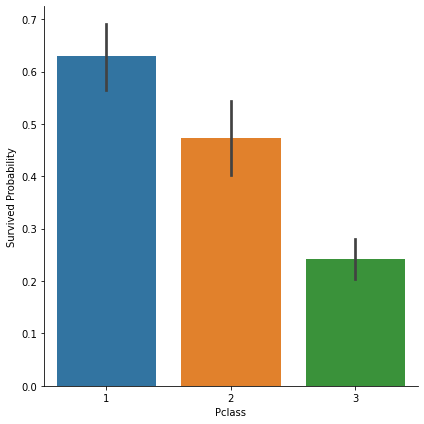

In [35]:
sns.factorplot(data=dataset_train, x="Pclass", y="Survived", kind="bar", size=6)
plt.ylabel("Survived Probability")
plt.show()

When a ship sinks, passengers on the upper deck will have a longer time to sink with the ship than on the middle or lower deck. It's a privilege. So, `Pclass` is <font color='green'>A FACTOR</font>.

### c. `Name` 
The name of a passenger. Everyday, we know that celebrities and influential people will always get a "privilege" in various ways. But when it becomes a disaster, everyone has an equal chance to survive. So, this one is <font color='red'>NOT A FACTOR</font>. But what if name title makes it becomes a factor? Let's check it. 


In [36]:
dataset_train["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in dataset_train["Name"]]
dataset_test["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in dataset_test["Name"]]

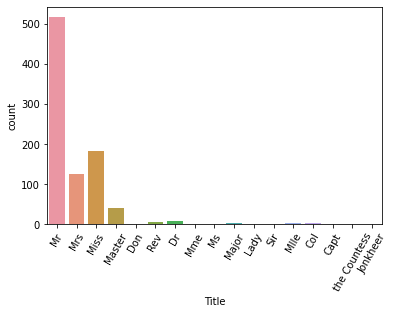

In [37]:
sns.countplot(data=dataset_train, x="Title")
plt.xticks(rotation = 60)
plt.show()

Change title name

In [38]:
dataset_train["Title"] = dataset_train["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona", "Mme", "Mlle", "Ms"],"Other")
dataset_test["Title"] = dataset_test["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona", "Mme", "Mlle", "Ms"],"Other")

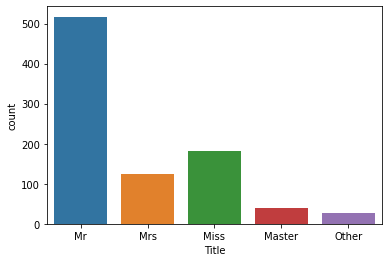

In [39]:
sns.countplot(data=dataset_train, x="Title")
plt.show()

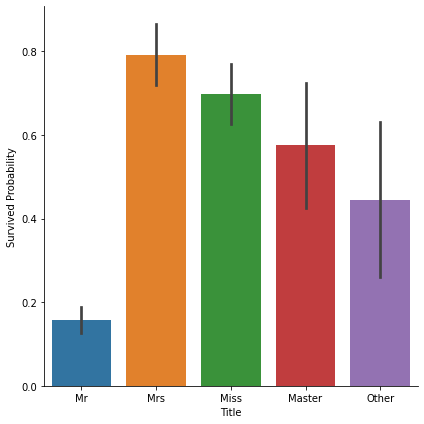

In [40]:
sns.factorplot(data=dataset_train, x="Title", y="Survived", kind="bar", size=6)
plt.ylabel("Survived Probability")
plt.show()

Title seems determine who might survive. But this seems to be more gender-related. So, this is <font color='red'>NOT A FACTOR</font>.

### d. `Sex`. 
As we know, men are actually stronger than women. This is a "stereotype". But somehow men can use their strength for rescuing themselves or weaker people.

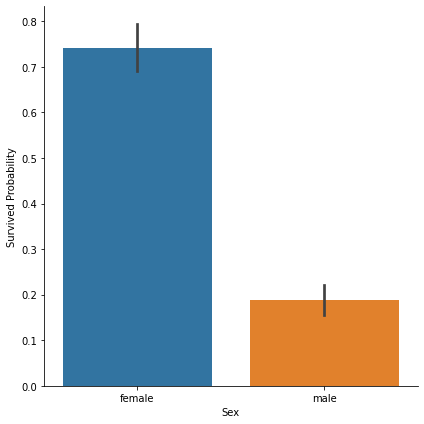

In [41]:
sns.factorplot(data=dataset_train, x="Sex", y="Survived", kind="bar", size=6)
plt.ylabel("Survived Probability")
plt.show()

From plot above we see that men seems to risk their lives to save women. `Sex` can be <font color='green'>A FACTOR</font> to determine who will survive. <br>

### e. `Age`

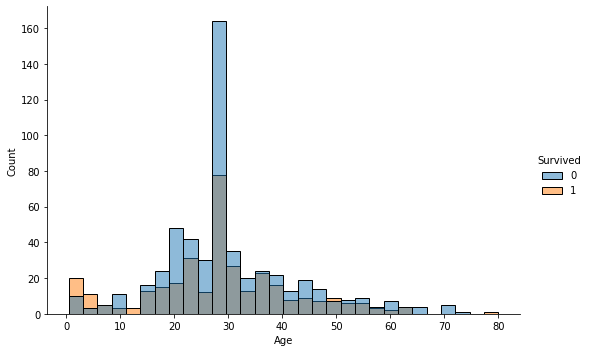

In [42]:
sns.displot(data=dataset_train, x='Age', hue="Survived", kind="hist", kde=False, aspect=1.5)
plt.show()

Adults are more likely to have higher survival chance than babies, young children and the elderly. But from the plot we see that passengers age within 20 - 30 have lower survival rate than babies and elderly. Their might sacrifice themselves to save others. So, `Age` is <font color='green'>A FACTOR</font>. <br>

### f. `Ticket` 
The ticket number owned by each passenger. This is not really informative since it is already represented by `Pclass`. So, the ticket number is <font color='red'>NOT A FACTOR</font>. <br>


### g. `Cabin` 
The cabin number for each passenger. This feature is already dropped in previous section. It can also be represented by `Pclass`. So, this is <font color='red'>NOT A FACTOR</font>. <br>


### h. `Embarked` 
Port of embarkation for every passenger. The values are `C`, `Q` and `S` which stands for Cherbourg, Queenstown and Southampton, respectively.

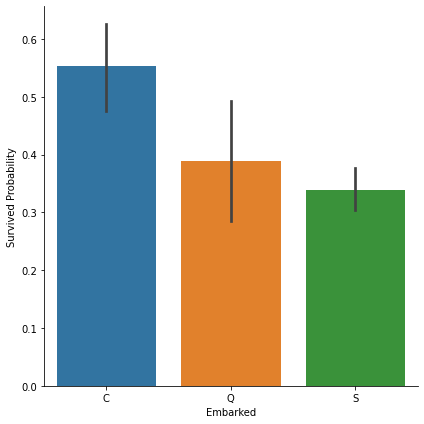

In [43]:
sns.factorplot(data=dataset_train, x="Embarked", y="Survived", kind="bar", size=6)
plt.ylabel("Survived Probability")
plt.show()

For some people, this feature is not a factor. But what if the place where a person came from has a culture of activity that makes him/her stronger than people from other places? From the plot, we also see that passengers from Cherbourg have higher survival rate from others. So, in my opinion this feature will be <font color='green'>A FACTOR</font>. <br>

### i. `Fare` 
Passenger fare for a ticket.


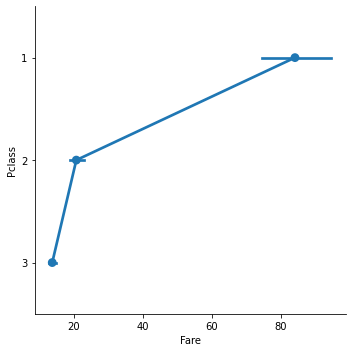

In [44]:
sns.catplot(data=dataset_train, x='Fare', y='Pclass', kind='point')
plt.show()

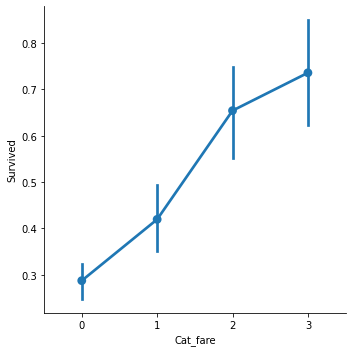

In [45]:
dataset_train['Cat_fare'] = pd.cut(dataset_train['Fare'], bins=[-1, 25, 50, 100, 550], labels=[0, 1, 2, 3])
dataset_test['Cat_fare'] = pd.cut(dataset_test['Fare'], bins=[-1, 25, 50, 100, 550], labels=[0, 1, 2, 3])

sns.catplot(data=dataset_train, x='Cat_fare', y='Survived', kind='point')
plt.show()

This feature is actually represented by `Pclass` and not directly related to survival rate. But we can see that passenger will possibly survive if they pay higher fare. In my opinion, this is optional. But we can try to use this feature as <font color='green'>A FACTOR</font>. <br>

### j. `SibSp` and `Parch`
`SibSp` represents number of siblings or spouses aboard the Titanic while `Parch` is number of parents or children. When a person sails with his/her relatives, there will be a tendency for that person to think about even saving them when a disaster happens. What if we sum these features and get a new category called `family_size`.


In [46]:
dataset_train['Family_size'] = dataset_train['SibSp'] + dataset_train['Parch'] + 1
dataset_test['Family_size'] = dataset_test['SibSp'] + dataset_test['Parch'] + 1

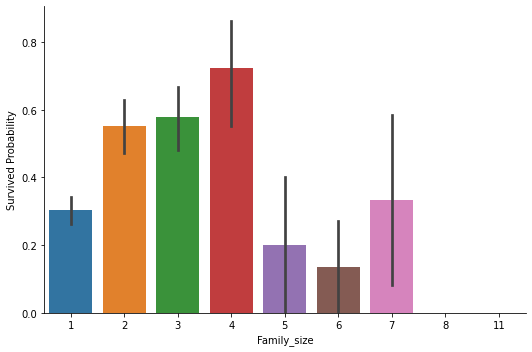

In [47]:
sns.factorplot(data=dataset_train, x="Family_size", y="Survived", kind="bar", aspect=1.5)
plt.ylabel("Survived Probability")
plt.show()

Family with size `1` means it's him/her self. A family with size less than 5 have higher survival rate. Let's create a new category of family. For a family size less than 5 equals to 1, others are 0.

In [48]:
dataset_train["Cat_family"] = [1 if i < 5 else 0 for i in dataset_train["Family_size"]]
dataset_test["Cat_family"] = [1 if i < 5 else 0 for i in dataset_test["Family_size"]]

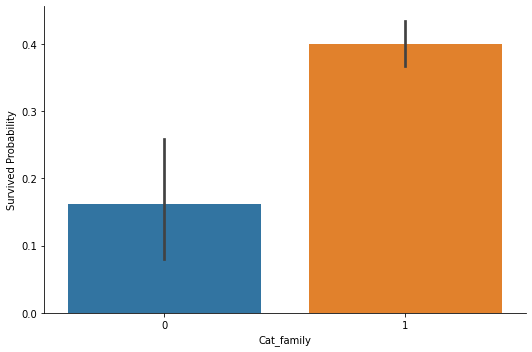

In [49]:
sns.factorplot(data=dataset_train, x="Cat_family", y="Survived", kind="bar", aspect=1.5)
plt.ylabel("Survived Probability")
plt.show()

We clearly see that our hypothesis is true. This is <font color='green'>A FACTOR</font> for someone to survive on the Titanic. <br>

### Summary

Factors that make a person could survive from a sinking ship are `Pclass`, `Sex`, `Age`, `Embarked`, `Cat_fare`, and `Cat_family`. So let's select those features in our dataset.

In [50]:
df_train = dataset_train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cat_family']]
df_test = dataset_test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cat_family']]

df_train['Survived'] = df_train['Survived'].astype('category')
df_train['Cat_family'] = df_train['Cat_family'].astype('category')

df_test['Cat_family'] = df_test['Cat_family'].astype('category')

In [51]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cat_family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,1


In [52]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Cat_family
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,1
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,1


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    category
 1   Pclass      891 non-null    category
 2   Sex         891 non-null    category
 3   Age         891 non-null    float64 
 4   Fare        891 non-null    float64 
 5   Embarked    891 non-null    category
 6   Cat_family  891 non-null    category
dtypes: category(5), float64(2)
memory usage: 19.0 KB


In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    category
 1   Sex         418 non-null    category
 2   Age         418 non-null    float64 
 3   Fare        418 non-null    float64 
 4   Embarked    418 non-null    category
 5   Cat_family  418 non-null    category
dtypes: category(4), float64(2)
memory usage: 8.8 KB


## More Visualizations

`Survived` distributions

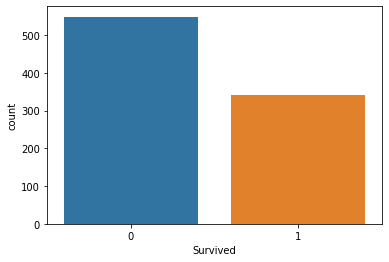

In [55]:
sns.countplot(data=df_train, x='Survived') 
plt.show()

In [101]:
df_train['Survived'].value_counts()/len(df_train)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

The data has a roughly 62:38 split, so we can treat our train dataset as being balanced and use the accuracy score as a metric.

Passenger classes by embarkation place

Passengers from Queenstown are mostly in the lower deck


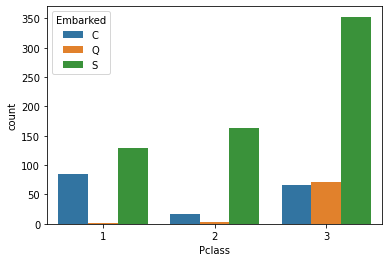

In [56]:
sns.countplot(df_train['Pclass'], hue=df_train['Embarked']) 

print('Passengers from Queenstown are mostly in the lower deck')

plt.show()

Survived passengers by `Age`

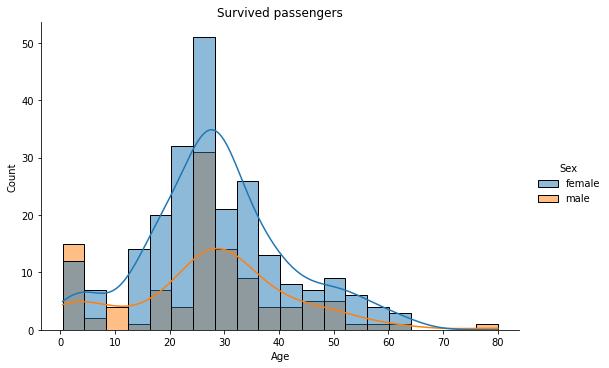

In [57]:
data = df_train[df_train['Survived'] == 1]

sns.displot(data=data, x='Age', hue="Sex", kind="hist", kde=True, fill=True, aspect=1.5)

plt.title("Survived passengers")
plt.show()

## Features Engineering

**Feature types** <br>
    * **Categorical** : `Survived`, `Pclass`, `Sex`, `Embarked`, `Cat_fare`, and `Cat_family` <br>
    * **Numerical** : `Age`, `Fare` <br>  
    
Let's encode `Title`, `Sex` and `Embarked` by using **LabelEncoder** and rescale `Age` and `Fare` by using **StandardScaler**.

In [58]:
encoder = LabelEncoder()

train_encoded_sex = encoder.fit_transform(df_train['Sex'].values)
train_encoded_embarked = encoder.fit_transform(df_train['Embarked'].values)
test_encoded_sex = encoder.fit_transform(df_test['Sex'].values)
test_encoded_embarked = encoder.fit_transform(df_test['Embarked'].values)

df_train['encoded_sex'] = train_encoded_sex
df_train['encoded_embarked'] = train_encoded_embarked
df_test['encoded_sex'] = test_encoded_sex
df_test['encoded_embarked'] = test_encoded_embarked

df_train['encoded_sex'] = df_train['encoded_sex'].astype('category')
df_train['encoded_embarked'] = df_train['encoded_embarked'].astype('category')
df_test['encoded_sex'] = df_test['encoded_sex'].astype('category')
df_test['encoded_embarked'] = df_test['encoded_embarked'].astype('category')


scaler = StandardScaler()

train_scaled_age = scaler.fit_transform(np.asarray(df_train['Age']).reshape(-1, 1))
train_scaled_fare = scaler.fit_transform(np.asarray(df_train['Fare']).reshape(-1, 1))
test_scaled_age = scaler.fit_transform(np.asarray(df_test['Age']).reshape(-1, 1))
test_scaled_fare = scaler.fit_transform(np.asarray(df_test['Fare']).reshape(-1, 1))

df_train['scaled_age'] = train_scaled_age.reshape(-1)
df_train['scaled_fare'] = train_scaled_fare.reshape(-1)
df_test['scaled_age'] = test_scaled_age.reshape(-1)
df_test['scaled_fare'] = test_scaled_fare.reshape(-1)

In [59]:
df_train = df_train.drop(['Sex', 'Age', 'Fare', 'Embarked'], axis=1)
df_test = df_test.drop(['Sex', 'Age', 'Fare', 'Embarked'], axis=1)

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    category
 1   Pclass            891 non-null    category
 2   Cat_family        891 non-null    category
 3   encoded_sex       891 non-null    category
 4   encoded_embarked  891 non-null    category
 5   scaled_age        891 non-null    float64 
 6   scaled_fare       891 non-null    float64 
dtypes: category(5), float64(2)
memory usage: 19.0 KB


In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Pclass            418 non-null    category
 1   Cat_family        418 non-null    category
 2   encoded_sex       418 non-null    category
 3   encoded_embarked  418 non-null    category
 4   scaled_age        418 non-null    float64 
 5   scaled_fare       418 non-null    float64 
dtypes: category(4), float64(2)
memory usage: 8.8 KB


## Let's Get It Started!

### Logistic Regression (aka logit, MaxEnt) Classifier

Define independent and dependent (target) features

In [62]:
y = df_train['Survived']
X = df_train.drop('Survived', axis=1)

# Divide train dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2022)

Define the model

In [63]:
model = LogisticRegression(max_iter=1000, n_jobs=2, random_state=2022)

Fit the model

In [64]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=2, random_state=2022)

Predict the validation sets

In [65]:
predictions = model.predict(X_valid)

In [66]:
model.score(X_valid, y_valid)

0.8295964125560538

Checking the accuracy

In [67]:
accuracy_score(y_valid, predictions)

0.8295964125560538

In [68]:
confusion_matrix(y_valid, predictions)

array([[128,  15],
       [ 23,  57]], dtype=int64)

Predict the test set

In [69]:
test_predictions = model.predict(df_test)

Check the confusion matrix and the accuracy score

In [70]:
confusion_matrix(dataset_result['Survived'], test_predictions)

array([[253,  13],
       [  8, 144]], dtype=int64)

In [71]:
accuracy_score(dataset_result['Survived'], test_predictions)

0.9497607655502392

In [72]:
ds = pd.DataFrame({"PassengerId":dataset_test['PassengerId'].values,
                  "Survived": test_predictions,
                  })

In [73]:
ds.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### CatBoostClassifier (Classification using Gradient Boosting on Decision Trees)

Define independent and dependent (target) features

In [74]:
y = df_train['Survived']
X = df_train.drop('Survived', axis=1)

# Divide train dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2022)

Define the model

In [75]:
model = cb.CatBoostClassifier(
    iterations=5,
    learning_rate=0.01,
    depth=5,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_state=2022
)

Fit the model

In [76]:
cat_features = ['Pclass', 'Cat_family', 'encoded_sex', 'encoded_embarked']

In [77]:
model.fit(X_train, y_train, cat_features=cat_features, plot=False, eval_set=(X_valid, y_valid))

0:	learn: 0.8053892	test: 0.8206278	best: 0.8206278 (0)	total: 167ms	remaining: 668ms
1:	learn: 0.8023952	test: 0.8161435	best: 0.8206278 (0)	total: 176ms	remaining: 264ms
2:	learn: 0.8053892	test: 0.8206278	best: 0.8206278 (0)	total: 188ms	remaining: 125ms
3:	learn: 0.7814371	test: 0.8026906	best: 0.8206278 (0)	total: 191ms	remaining: 47.7ms
4:	learn: 0.8053892	test: 0.8251121	best: 0.8251121 (4)	total: 205ms	remaining: 0us

bestTest = 0.8251121076
bestIteration = 4



Predict the validation sets

In [78]:
predictions = model.predict(X_valid)

Checking the accuracy

In [79]:
accuracy_score(y_valid, predictions)

0.8251121076233184

In [80]:
confusion_matrix(y_valid, predictions)

array([[129,  14],
       [ 25,  55]], dtype=int64)

Predict the test set

In [81]:
test_predictions = model.predict(df_test)

Check the confusion matrix and the accuracy score

In [82]:
confusion_matrix(dataset_result['Survived'], test_predictions)

array([[266,   0],
       [  4, 148]], dtype=int64)

In [83]:
accuracy_score(dataset_result['Survived'], test_predictions)

0.9904306220095693

In [84]:
ds = pd.DataFrame({"PassengerId":dataset_test['PassengerId'].values,
                  "Survived": test_predictions,
                  })

In [85]:
ds.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## What if `Fare` is excluded from the data?

In [86]:
df_train = df_train.drop(['scaled_fare'], axis=1)
df_test = df_test.drop(['scaled_fare'], axis=1)

y = df_train['Survived']
X = df_train.drop('Survived', axis=1)

# Divide train dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2022)

Define the model

In [87]:
model = cb.CatBoostClassifier(
    iterations=5,
    learning_rate=0.01,
    depth=5,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_state=2022
)

Fit the model

In [88]:
cat_features = ['Pclass', 'Cat_family', 'encoded_sex', 'encoded_embarked']

In [89]:
model.fit(X_train, y_train, cat_features=cat_features, plot=False, eval_set=(X_valid, y_valid))

0:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 3.79ms	remaining: 15.1ms
1:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 7.43ms	remaining: 11.1ms
2:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 10.8ms	remaining: 7.23ms
3:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 24.2ms	remaining: 6.04ms
4:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 34.6ms	remaining: 0us

bestTest = 0.802690583
bestIteration = 0

Shrink model to first 1 iterations.


Predict the validation sets

In [90]:
predictions = model.predict(X_valid)

Checking the accuracy

In [91]:
accuracy_score(y_valid, predictions)

0.8026905829596412

In [92]:
confusion_matrix(y_valid, predictions)

array([[123,  20],
       [ 24,  56]], dtype=int64)

Predict the test set

In [93]:
test_predictions = model.predict(df_test)

Check the confusion matrix and the accuracy score

In [94]:
confusion_matrix(dataset_result['Survived'], test_predictions)

array([[266,   0],
       [  0, 152]], dtype=int64)

In [95]:
accuracy_score(dataset_result['Survived'], test_predictions)

1.0

In [96]:
ds = pd.DataFrame({"PassengerId":dataset_test['PassengerId'].values,
                  "Survived": test_predictions,
                  })

In [97]:
ds.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Since we didn't drop any outliers, it's more optimized when `Fare` is excluded from data. For the next steps, we'll use this dataset. 

In [98]:
df_train.to_csv("train_clean.csv", index=False)
df_test.to_csv("test_clean.csv", index=False)